In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# notebook에 직접 그래프 plot
%matplotlib inline

In [2]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)
print("numpy:", np.__version__, "  pandas:", pd.__version__, "  seaborn:", sns.__version__)

C:\ProgramData\Anaconda3\python.exe
3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
numpy: 1.18.1   pandas: 1.0.1   seaborn: 0.10.0


In [3]:
Default=pd.read_excel('C:/Users/Hyeondo/OneDrive - 연세대학교 (Yonsei University)/data/data_1/Default.xlsx')

In [4]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [5]:
Default.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [6]:
Default.describe(include='all')

,Unnamed: 0,default,student,balance,income
count,10000.00000,10000,10000,10000.000000,10000.000000
unique,NaN,2,2,NaN,NaN
top,NaN,No,No,NaN,NaN
freq,NaN,9667,7056,NaN,NaN
mean,5000.50000,NaN,NaN,835.374886,33516.981876
std,2886.89568,NaN,NaN,483.714985,13336.639563
min,1.00000,NaN,NaN,0.000000,771.967729
25%,2500.75000,NaN,NaN,481.731105,21340.462903
50%,5000.50000,NaN,NaN,823.636973,34552.644802
75%,7500.25000,NaN,NaN,1166.308386,43807.729272


In [7]:
Default.default.value_counts() # Class Imbalance

No     9667
Yes     333
Name: default, dtype: int64

In [8]:
Default.student.value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [9]:
pd.crosstab(Default.student,Default.default)

default,No,Yes
student,,
No,6850,206
Yes,2817,127


In [10]:
# default한 사람들과 다른 이들간의 balance 차가 있을까?
Default.balance.groupby(by=Default['default']).mean()

default
No      803.94375
Yes    1747.82169
Name: balance, dtype: float64

In [11]:
Default.balance.groupby(by=Default['default']).describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
No,9667.0,803.94375,456.476236,0.000000,465.714646,802.857102,1128.248851,2391.007739
Yes,333.0,1747.82169,341.266808,652.397134,1511.610952,1789.093391,1988.869747,2654.322576


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


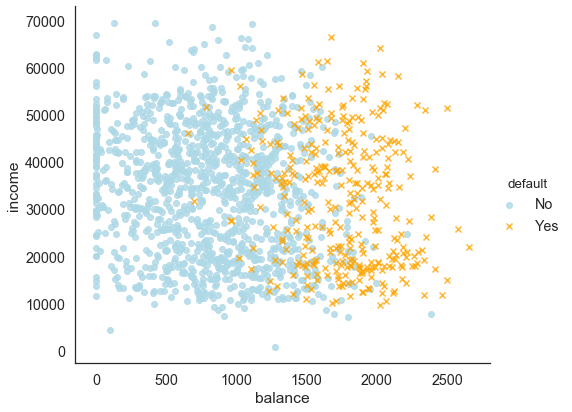

In [12]:
# Take just 1200 samples from deafult=='No' and all from default == 'Yes'
some_of_No=pd.concat([Default.loc[Default.default=='No',:].sample(n=1200),
                       Default.loc[Default.default=='Yes',:] ],axis=0)
sns.set(style='white',font_scale=1.3)
def_palette={'No':'lightblue','Yes':'orange'}
sns.lmplot('balance','income',data=some_of_No,hue='default',fit_reg=False,
          markers=['o','x'],size=6,aspect=1.2,palette=def_palette)

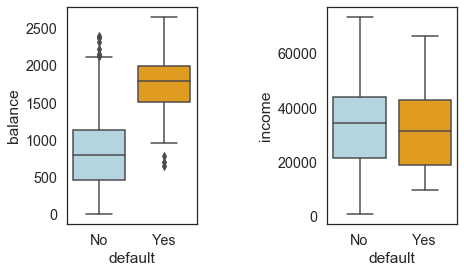

In [13]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(7,4))
fig.subplots_adjust(wspace=1)

sns.boxplot('default','balance',data=Default,orient='v',ax=ax1,palette=def_palette)
sns.boxplot('default','income',data=Default,orient='v',ax=ax2,palette=def_palette)

In [14]:
# Logistic Regression
# numeric feature만 허용하기에, 
#카테고리 변수들은 dummy variable을 사용해 실수로 encoding하여 사용

pd.get_dummies(Default).head()

,Unnamed: 0,balance,income,default_No,default_Yes,student_No,student_Yes
0,1,729.526495,44361.625074,1,0,1,0
1,2,817.180407,12106.134700,1,0,0,1
2,3,1073.549164,31767.138947,1,0,1,0
3,4,529.250605,35704.493935,1,0,1,0
4,5,785.655883,38463.495879,1,0,1,0


In [15]:
Default_enc=pd.get_dummies(Default,drop_first=True)
Default_enc.head()

,Unnamed: 0,balance,income,default_Yes,student_Yes
0,1,729.526495,44361.625074,0,0
1,2,817.180407,12106.134700,0,1
2,3,1073.549164,31767.138947,0,0
3,4,529.250605,35704.493935,0,0
4,5,785.655883,38463.495879,0,0


In [16]:
#Import scikit-learn Logistic Regression estimator
from sklearn.linear_model import LogisticRegression

In [17]:
# instantiate the estimator with the solver 'newton-cg'
logistic_reg=LogisticRegression(solver='newton-cg')

# Training set로 모든 observation을 사용. Predictor로는 'balance'
X=Default_enc.balance.values.reshape(-1,1)
#LogisticRegression이 X를 2D로 인터페이스하기에 reshape 하여 nx1 행렬로..

#Response로는 Default_Yes
y=Default_enc.default_Yes

#Fit the model
logistic_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
print('classes: ',logistic_reg.classes_)
print('intercept :', logistic_reg.intercept_)
print('coefficient: ',logistic_reg.coef_) 

classes:  [0 1]
intercept : [-10.65133001]
coefficient:  [[0.00549892]]


In [19]:
# Logistic Regression의 경우엔 Logistic 함수의 출력인 (0, 1) 사이의 값 (odds)을 보고 
# threshold 값을 선택해 클래스를 결정한다.
X_new = np.array([1000, 2000, 1700]).reshape(-1,1)
logistic_reg.predict_proba(X_new)

array([[0.99424785, 0.00575215],
       [0.41423066, 0.58576934],
       [0.78636832, 0.21363168]])

In [20]:
logistic_reg.predict(X_new) #추정한 response를 클래스로 요청, threshold : 0.5

array([0, 1, 0], dtype=uint8)

In [21]:
logistic_reg = LogisticRegression(solver='newton-cg')  
X = Default_enc.student_Yes.values.reshape(-1, 1)
y = Default_enc.default_Yes
logistic_reg.fit(X, y)
print('classes: ',logistic_reg.classes_)
print('intercept :', logistic_reg.intercept_)
print('coefficient: ',logistic_reg.coef_)

classes:  [0 1]
intercept : [-3.50213151]
coefficient:  [[0.39959759]]


In [22]:
X_new=np.array([1,0]).reshape(-1,1)
logistic_reg.predict_proba(X_new)
#학생일 때 default 확률이 0.043으로 학생이 아닐 때의 0.029 보다 조금 더 높아지긴 했음

array([[0.95699715, 0.04300285],
       [0.97074836, 0.02925164]])

In [23]:
#Multiple Logistic Regression
Default_enc.head(3)

,Unnamed: 0,balance,income,default_Yes,student_Yes
0,1,729.526495,44361.625074,0,0
1,2,817.180407,12106.134700,0,1
2,3,1073.549164,31767.138947,0,0


In [24]:
X=Default_enc.loc[:,['balance','income','student_Yes']]
X['income']=X['income']*0.001
y=Default_enc.default_Yes

In [25]:
X.head()

,balance,income,student_Yes
0,729.526495,44.361625,0
1,817.180407,12.106135,1
2,1073.549164,31.767139,0
3,529.250605,35.704494,0
4,785.655883,38.463496,0


In [26]:
logistic_reg.fit(X,y)
print('classes: ',logistic_reg.classes_)
print('intercept :', logistic_reg.intercept_)
print('coefficient: ')
list(zip(X.columns, logistic_reg.coef_[0]))  
#학생이면 default 가능성 down

classes:  [0 1]
intercept : [-10.90180131]
coefficient: 


[('balance', 0.005730606101921113),
 ('income', 0.003961642311686695),
 ('student_Yes', -0.6125701813195333)]

In [27]:
X_new=np.array([[1500,40,1],[1500,40,0]])
logistic_reg.predict_proba(X_new)
#default  확률 증가(학생아니면)

array([[0.94047545, 0.05952455],
       [0.89542805, 0.10457195]])

In [28]:
Smarket=pd.read_csv('C:/Users/Hyeondo/OneDrive - 연세대학교 (Yonsei University)/data/data_1/Smarket.csv',index_col=0)

In [29]:
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [30]:
Smarket.shape

(1250, 9)

In [31]:
Smarket.describe(include='all')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,648
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138,NaN
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334,NaN
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000,NaN
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500,NaN
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500,NaN
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750,NaN


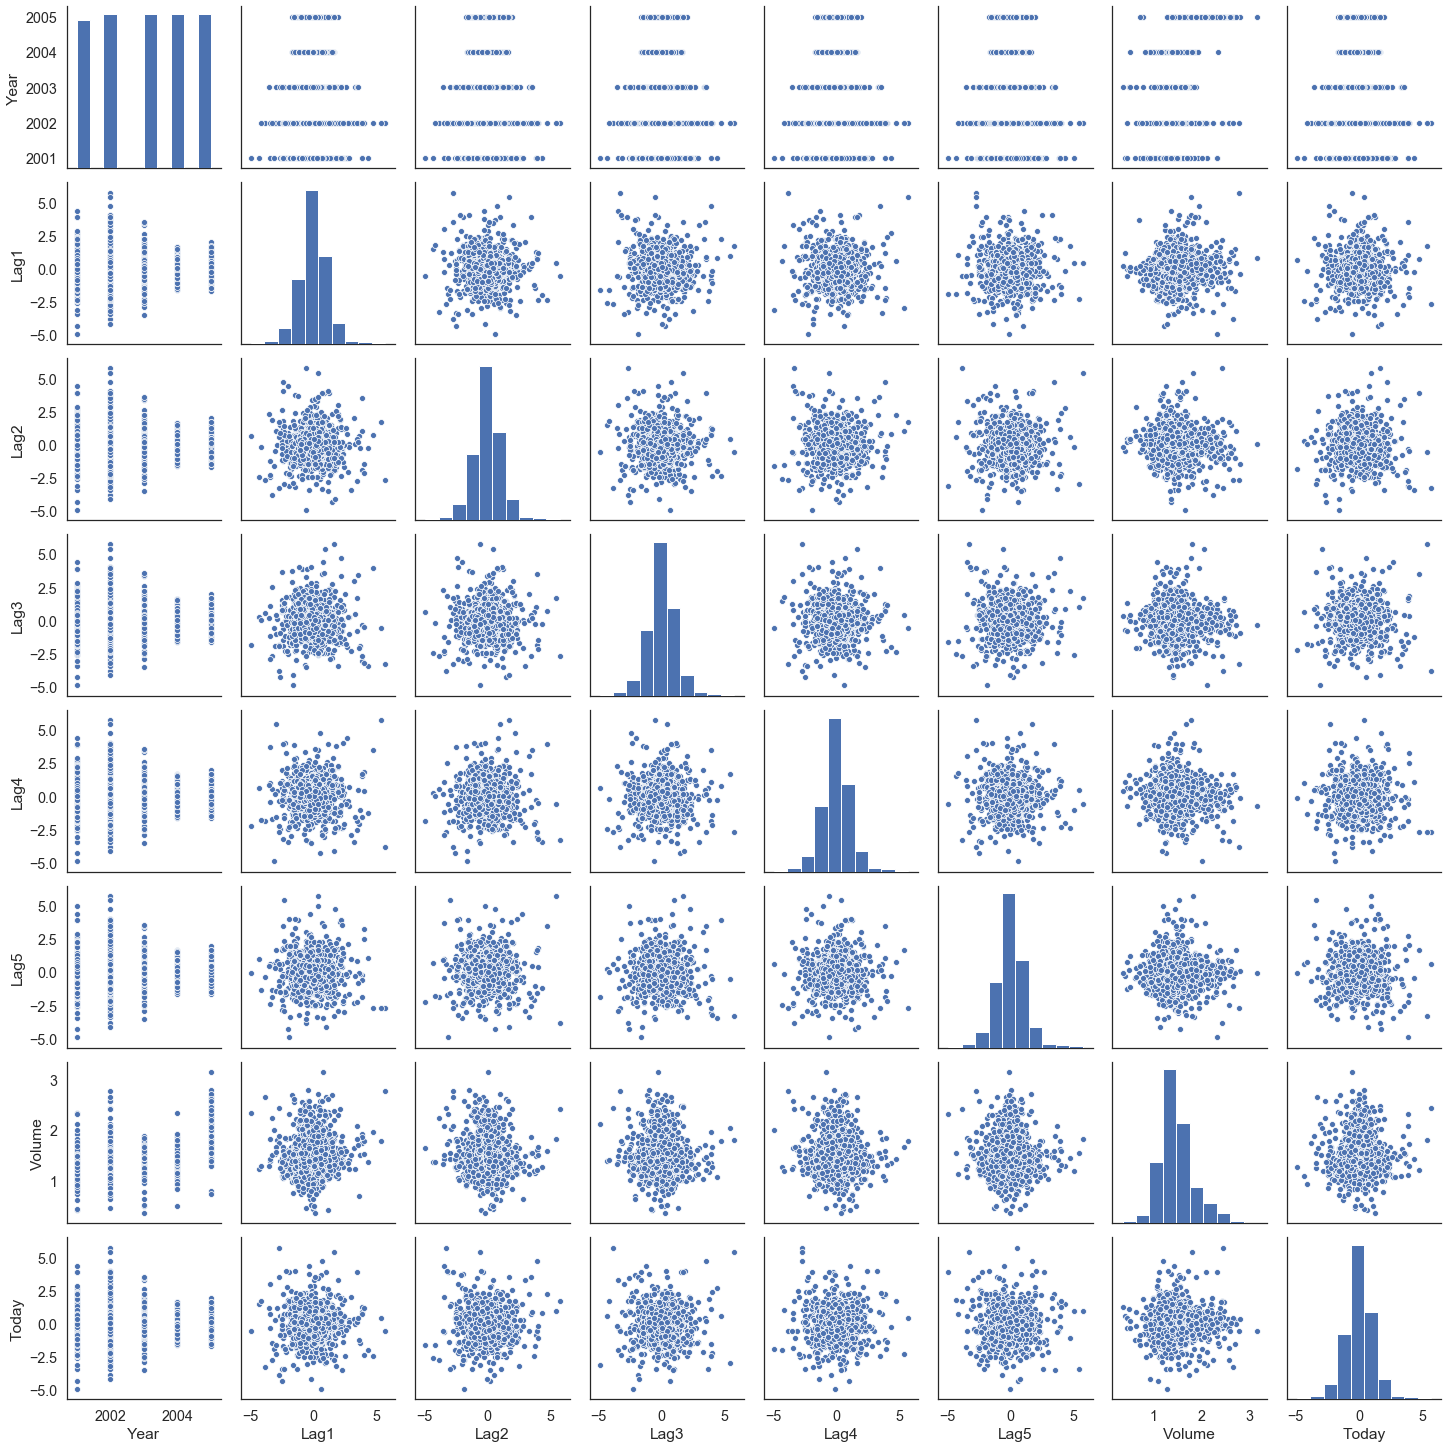

In [32]:
sns.pairplot(Smarket)

In [33]:
Smarket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1 to 1250
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 137.7+ KB


In [34]:
Smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


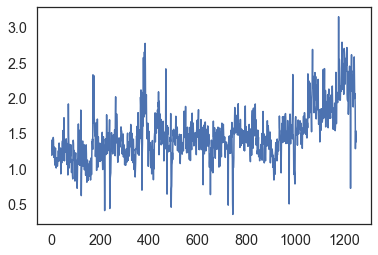

In [35]:
plt.plot(Smarket.Volume)

(-50, 1312.4551949005768)

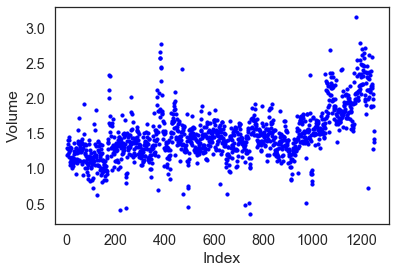

In [36]:
plt.scatter(x=Smarket.index,y=Smarket.Volume,marker='o',c='blue',s=10)
plt.xlabel('Index')
plt.ylabel('Volume')
plt.xlim(xmin=-50)

In [37]:
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [38]:
#Direction Column 을 dummy encoding
Smarket_enc=pd.get_dummies(Smarket,drop_first=True)
Smarket_enc.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


In [39]:
# Predictor : 'Lag1', ... , 'Volume'
# Response : 'Direction_Up'
X=Smarket_enc.loc[:,'Lag1':'Volume']
y=Smarket_enc.Direction_Up
logreg=LogisticRegression(solver='newton-cg')
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
print('Intercept:',logreg.intercept_)
list(zip(X.columns,logreg.coef_[0]))

Intercept: [-0.12107884]


[('Lag1', -0.07284382332761143),
 ('Lag2', -0.04223527443392866),
 ('Lag3', 0.011016099836884553),
 ('Lag4', 0.009283636651076881),
 ('Lag5', 0.010263449074427946),
 ('Volume', 0.132108368667562)]

In [41]:
# Training Performance 
list(zip(X.index,logreg.predict_proba(X=X)[:10,1]))

[(1, 0.5073437046486303),
 (2, 0.48174499259329334),
 (3, 0.48129808387853873),
 (4, 0.5153494899736936),
 (5, 0.5109913998592839),
 (6, 0.5070647038303314),
 (7, 0.49274928196958434),
 (8, 0.5092790175182677),
 (9, 0.5178331612231709),
 (10, 0.4890946117467889)]

In [42]:
y_pred_class=logreg.predict(X=X)
y_pred_class.sum()

965

In [43]:
(y==y_pred_class).sum()

651

In [44]:
(y==y_pred_class).mean()

0.5208

In [45]:
Smarket.Direction.value_counts()

Up      648
Down    602
Name: Direction, dtype: int64

In [46]:
# Confusion Matrix ~ Classification/Regression
train_filter=Smarket_enc.Year<2005
train_filter.value_counts()

True     998
False    252
Name: Year, dtype: int64

In [47]:
X_train=Smarket_enc.loc[train_filter,'Lag1':'Volume']
y_train=Smarket_enc.loc[train_filter,'Direction_Up']
X_test=Smarket_enc.loc[~train_filter,'Lag1':'Volume']
y_test=Smarket_enc.loc[~train_filter,'Direction_Up']
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
#Test the model with the Test Set and get the estimated responses in probability
y_test_pred_prob=logreg.predict_proba(X=X_test)
y_test_pred_prob[:5]

array([[0.47268383, 0.52731617],
       [0.48411655, 0.51588345],
       [0.4768594 , 0.5231406 ],
       [0.48564818, 0.51435182],
       [0.50140487, 0.49859513]])

In [49]:
y_test_pred_class=logreg.predict(X=X_test)
y_test_pred_class[:5]

array([1, 1, 1, 1, 0], dtype=uint8)

In [50]:
[ 1 if prob>0.5 else 0 for prob in y_test_pred_prob[:, 1] ][:5]   # 첫 5개

[1, 1, 1, 1, 0]

In [51]:
(y_test==y_test_pred_class).mean()

0.48412698412698413

In [52]:
# Scikit-learn metrics 모듈 이용 Classifier 성능 분석
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,y_test_pred_class))
print('Accuracy(manual calculation):%0.7f'%(y_test==y_test_pred_class).mean())

Accuracy: 0.48412698412698413
Accuracy(manual calculation):0.4841270


In [53]:
conf_mat=metrics.confusion_matrix(y_test,y_test_pred_class,labels=[1,0])
print(conf_mat)

[[48 93]
 [37 74]]


In [54]:
(conf_mat[0,0]+conf_mat[1,1])/conf_mat.sum()
# confusion matrix에서 Accuracy 계산

0.48412698412698413

In [55]:
print('Sensitivity=%f'%(conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])))

Sensitivity=0.666667


In [56]:
# statsmodels 라이브러리 활용한 logistic regression

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [57]:
Smarket=pd.read_csv('C:/Users/Hyeondo/OneDrive - 연세대학교 (Yonsei University)/data/data_1/Smarket.csv'
,index_col=0,parse_dates=True)
Smarket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1 to 1250
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 97.7+ KB


In [58]:
logreg_stats=smf.glm(formula='Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume',
                    data=Smarket,family=sm.families.Binomial()).fit()
logreg_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Fri, 01 May 2020   Deviance:                       1727.6
Time:                                          16:57:26   Pearson chi2:                 1.25e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1260      0.241      0.523      0.601      -0.346       0.598
Lag1           0.0731      0.050      1.457      0.145      -0.025       0.171
Lag2           0.0423      0.050      0.845      0.398      -0.056       0.140
Lag3          -0.0111      0.050     -0.222      0.824      -0.109       0.087
Lag4          -0.0094      0.050     -0.187      0.851      -0.107       0.089
Lag5          -0.0103      0.050     -0.208      0.835      -0.107       0.087
Volume        -0.1354      0.158     -0.855      0.392      -0.446       0.175
==============================================================================
"""

In [59]:
print(logreg_stats.model.endog[:10])
print(Smarket.Direction.values[:10])

print("\n'Down' 이 1로 coding 되어 있음을 다시 확인하기 위해서 : 'Down'이 602개 이었으니")
print(Smarket.Direction.value_counts())
print('\nDowns : ', logreg_stats.model.endog.sum())

[0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
['Up' 'Up' 'Down' 'Up' 'Up' 'Up' 'Down' 'Up' 'Up' 'Up']

'Down' 이 1로 coding 되어 있음을 다시 확인하기 위해서 : 'Down'이 602개 이었으니
Up      648
Down    602
Name: Direction, dtype: int64

Downs :  602.0


In [60]:
#fit된 모델에게 새로운 predictor를 주지 않으면 training set에 대한 response의 확률을 준다
logreg_stats_pred_prob=logreg_stats.predict()
logreg_stats_pred_prob[:10]

array([0.49291587, 0.51853212, 0.51886117, 0.48477764, 0.48921884,
       0.49304354, 0.50734913, 0.49077084, 0.48238647, 0.51116222])

In [61]:
logreg_stats_pred_class=[('Up'if prob<0.5 else 'Down')for prob in logreg_stats_pred_prob]
logreg_stats_pred_class[:5]

['Up', 'Down', 'Down', 'Up', 'Up']

In [62]:
# confusion matrix
conf_mat=metrics.confusion_matrix(Smarket.Direction, logreg_stats_pred_class)
print(conf_mat)

[[145 457]
 [141 507]]


In [63]:
logreg_stats=smf.glm(formula='Direction~Lag1+Lag2',
                     data=Smarket,subset=train_filter,
                      family=sm.families.Binomial()).fit()
logreg_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                  998
Model:                                              GLM   Df Residuals:                      995
Model Family:                                  Binomial   Df Model:                            2
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -690.70
Date:                                  Fri, 01 May 2020   Deviance:                       1381.4
Time:                                          16:57:26   Pearson chi2:                     998.
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0322      0.063     -0.508      0.611      -0.156       0.092
Lag1           0.0556      0.052      1.076      0.282      -0.046       0.157
Lag2           0.0445      0.052      0.861      0.389      -0.057       0.146
==============================================================================
"""

In [64]:
X_test=Smarket.loc[~train_filter,['Lag1','Lag2']]
y_test_pred=logreg_stats.predict(X_test)
y_test_pred_class=[1 if prob<0.5 else 0 for prob in y_test_pred]

conf_mat=metrics.confusion_matrix(y_test,y_test_pred_class)
print(conf_mat)

[[ 35  76]
 [ 35 106]]


In [65]:
TP=conf_mat[1,1]
TN=conf_mat[0,0]
FP=conf_mat[0,1]
FN=conf_mat[1,0]

#print ('Accuracy:', conf_mat.diagnoal().sum()/conf_mat.sum())
print('Accuracy: ', (TP+TN)/(TP+TN+FP+FN))
print('Sensitivity: ',TP/(FN+TP))
print('Precision: ',TP/(FP+TP))
print('False Positive Rate: ',FP/(FP+TN))

Accuracy:  0.5595238095238095
Sensitivity:  0.75177304964539
Precision:  0.5824175824175825
False Positive Rate:  0.6846846846846847


In [66]:
X_test.head()

,Lag1,Lag2
999,-0.134,0.008
1000,-0.812,-0.134
1001,-1.167,-0.812
1002,-0.363,-1.167
1003,0.351,-0.363


In [67]:
Down_Prob=logreg_stats.predict(pd.DataFrame([[1.2,1.1],[1.5,-0.8]],
                                           columns=['Lag1','Lag2']))# 0 : UP, 1 : Down
print('Up probabilities for the 2 samples are %s and %s' % 
      ((1 - Down_Prob)[0], (1 - Down_Prob)[1]))

Up probabilities for the 2 samples are 0.479146239110393 and 0.4960938729355764


In [68]:
print('exit 0')

exit 0
